In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plot_ss
import matplotlib.pyplot as plt

2024-04-22 15:26:23.276231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 15:26:23.795189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Plot System Size

In [3]:
base_logdir = 'ss_results/'
keys = [
    'charts/val_rel_ret',
    'charts/val_rx_diff'
]
dat = plot_ss.gather_data(base_logdir, keys)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


1.007487416267395 5475.0
1.0120213031768799 5475.0
1.0230658054351807 5475.0
1.0353440046310425 5475.0


Text(0.5, 1.0, 'Relative Return vs Optimal Controller')

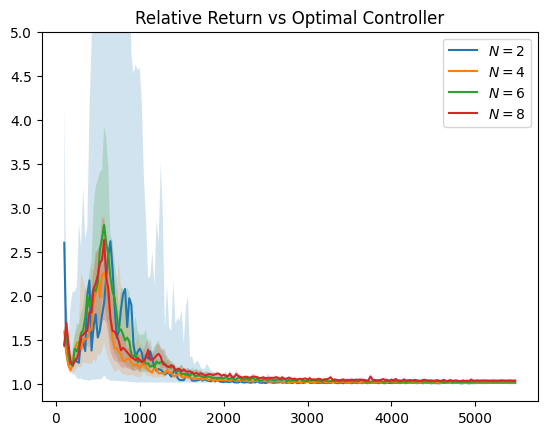

In [4]:
key = 'charts/val_rel_ret'
plot_ss.plot(dat[key], 'N')
plt.ylim([0.8, 5])
plt.title('Relative Return vs Optimal Controller')

0.003775151213631034 5475.0
0.00597919337451458 5475.0
0.009897773154079914 5475.0
0.011457381770014763 5475.0


Text(0.5, 1.0, 'Mean Deviation from Reference')

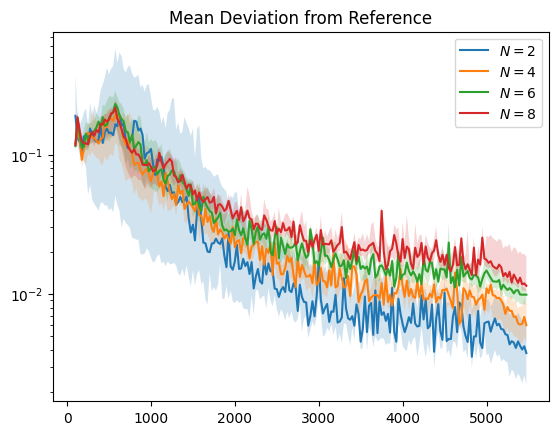

In [5]:
key = 'charts/val_rx_diff'
plot_ss.plot(dat[key], 'N')
plt.yscale('log')
plt.title('Mean Deviation from Reference')

## Plot Rho Results

In [3]:
base_logdir = 'rho_results/'
keys = [
    'charts/val_rel_ret',
    'charts/val_rx_diff'
]
dat = plot_ss.gather_data(base_logdir, keys)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


0.03958970680832863
0.010935806669294834
0.0050023687072098255
0.003738295054063201
0.0032434442546218634


Text(0.5, 1.0, 'Mean Deviation from Reference')

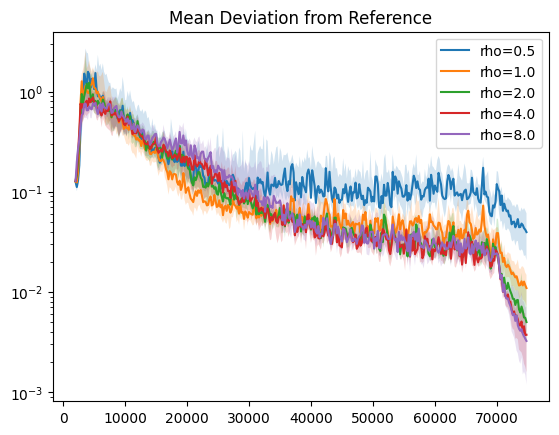

In [4]:
key = 'charts/val_rx_diff'
plot_ss.plot(dat[key], 'rho')
plt.yscale('log')
plt.title('Mean Deviation from Reference')

2.040963888168335
1.2401089668273926
1.1113241910934448
1.1047488451004028
1.1950958967208862


Text(0.5, 1.0, 'Relative Return vs Optimal Controller')

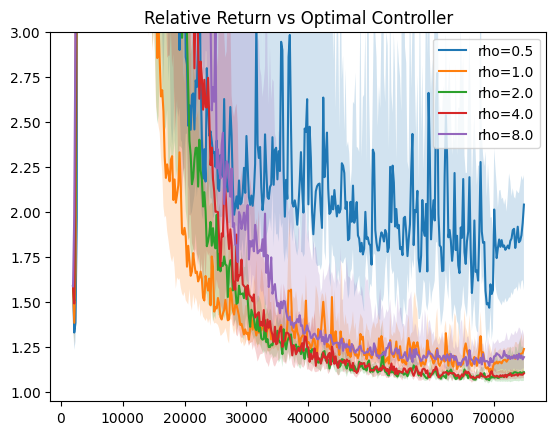

In [5]:
key = 'charts/val_rel_ret'
plot_ss.plot(dat[key], 'rho')
plt.ylim([0.95, 3])
plt.title('Relative Return vs Optimal Controller')

## Dual vs No Dual

In [19]:
import matplotlib 


In [29]:
keys = [
    'charts/val_rel_ret',
    'charts/val_rx_diff'
]
base_logdir = 'noduallarge_results/'
dat_no_dual = plot_ss.gather_data(base_logdir, keys)
base_logdir = 'sslarge_results/'
dat_with_dual = plot_ss.gather_data(base_logdir, keys)

1.0118767023086548 5480.0
1.003803014755249 5480.0
1.0287166833877563 5480.0
1.009304404258728 5480.0
1.0364426374435425 5480.0
1.0202144384384155 5480.0
1.0527095794677734 5480.0
1.0312137603759766 5480.0


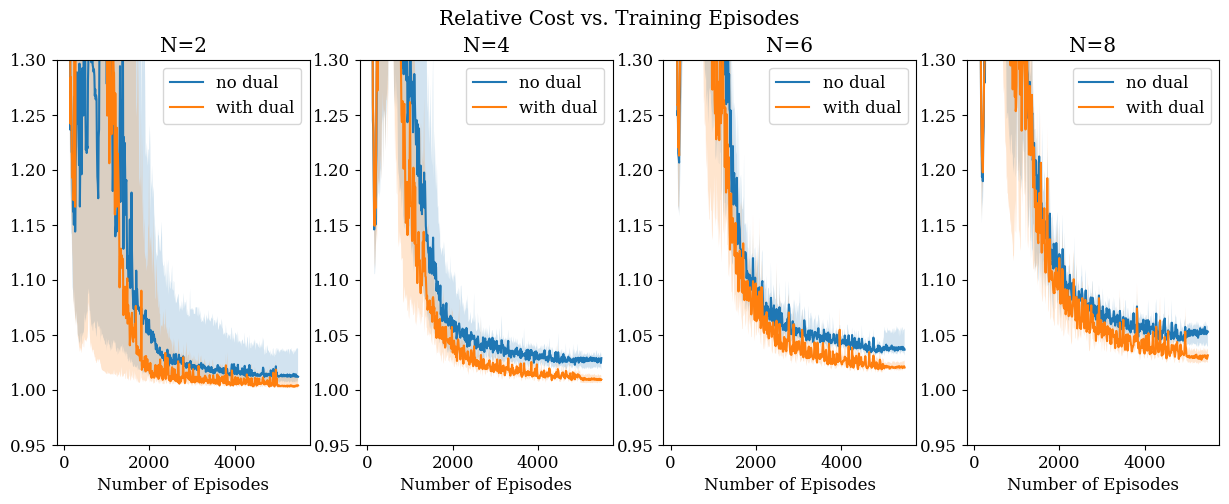

In [38]:
# Plot relative cost
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif' # Was 'sans-serif'

omit = 1
key = 'charts/val_rel_ret'
sizes = sorted(dat_no_dual[key].keys())
ylim = [0.95, 1.3]

plt.figure(figsize=(15, 5))
for i, size in enumerate(sizes):
    plt.subplot(1, len(sizes), i+1)
    # Plot with dual result
    plot_ss.plot_single(dat_no_dual[key][size], 'no dual', omit=omit)
    plot_ss.plot_single(dat_with_dual[key][size], 'with dual', omit=omit)
    plt.title(f'N={int(size)}')
    plt.ylim(ylim)
    plt.xlabel('Number of Episodes')
plt.suptitle('Relative Cost vs. Training Episodes')
plt.savefig('./rel_cost.pdf', dpi=250)

0.04608941823244095 5480.0
0.0024607665836811066 5480.0
0.04578959941864014 5480.0
0.003684461582452059 5480.0
0.06098474562168121 5480.0
0.00865187868475914 5480.0
0.06279285997152328 5480.0
0.009056340903043747 5480.0


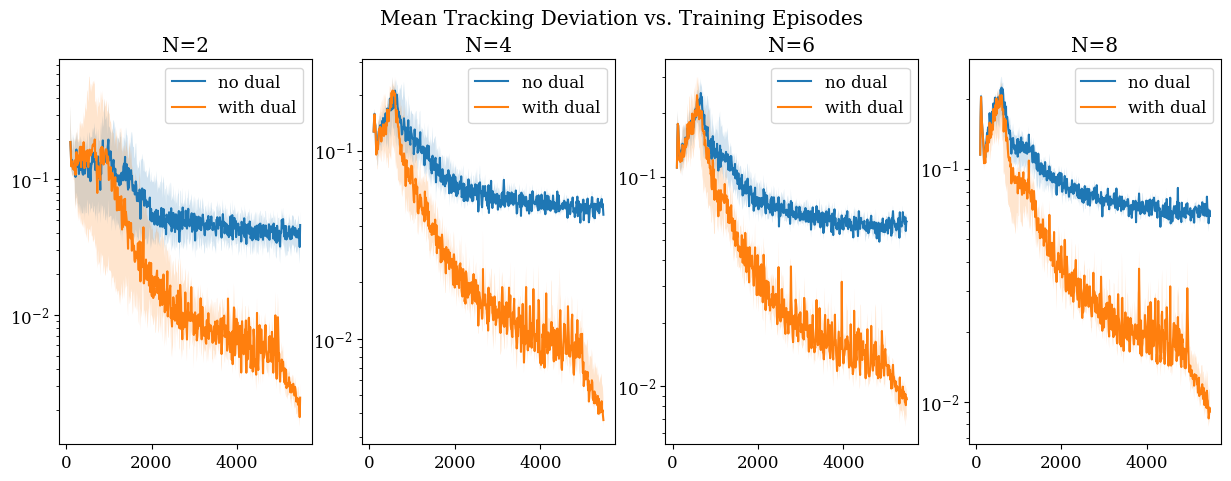

In [39]:
# Plot rx diff
key = 'charts/val_rx_diff'
sizes = sorted(dat_no_dual[key].keys())
ylim = [1e-3, 2]

plt.figure(figsize=(15, 5))
for i, size in enumerate(sizes):
    plt.subplot(1, len(sizes), i+1)
    # Plot with dual result
    plot_ss.plot_single(dat_no_dual[key][size], 'no dual', omit=omit)
    plot_ss.plot_single(dat_with_dual[key][size], 'with dual', omit=omit)
    plt.title(f'N={int(size)}')
    plt.yscale('log')
    #plt.ylim(ylim)
plt.suptitle('Mean Tracking Deviation vs. Training Episodes')
plt.savefig('./tracking_dev.pdf', dpi=250)

## Plot difference between dual and optimal dual map

In [6]:
keys = ['charts/dual_diff']
base_logdir = 'ss_results/'
dat_with_dual = plot_ss.gather_data(base_logdir, keys)

0.11972881108522415 5475.0
0.16245275735855103 5475.0
0.21019381284713745 5475.0
0.30979451537132263 5475.0


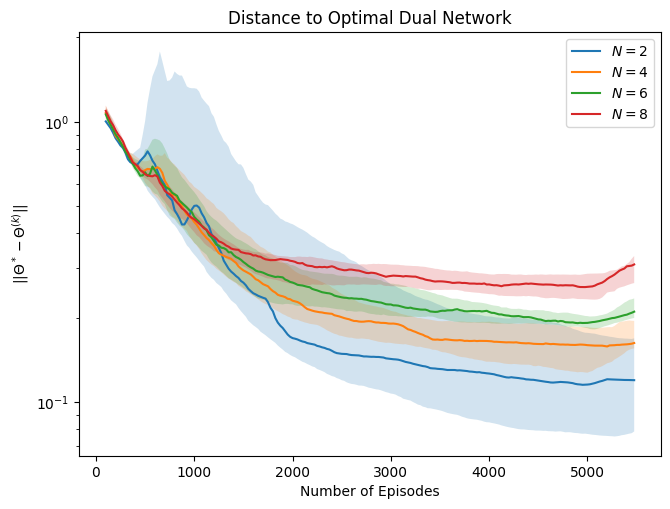

In [7]:
key = 'charts/dual_diff'
plt.figure(figsize=(7.5, 5.5))
plot_ss.plot(dat_with_dual[key], 'N', omit=1)
plt.yscale('log')
plt.xlabel('Number of Episodes') # add a divide by 20 to the x ticks to convert to episodes instead of transitions
plt.ylabel(r'$||\Theta^* - \Theta^{(k)}||$')
plt.title(r'Distance to Optimal Dual Network')
plt.savefig('./theta.pdf', dpi=250)

In [133]:
plt.gcf().get_size_inches()

array([6.4, 4.8])

<Figure size 640x480 with 0 Axes>